In [7]:
import pandas as pd
import numpy as np
import time
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [8]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
gtd = pd.read_excel('gtd_13to16_0617dist.xlsx')
gtd.head()

,eventid,iyear,imonth,iday,Unnamed: 4,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201301010001,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,201301010002,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
2,201301010003,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010003, 201301010002"
3,201301010004,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,-9,-9,0,-9,NaN
4,201301010005,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Tragedy averted: 5kg bomb defused near po...","""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...",START Primary Collection,0,0,0,0,NaN


In [10]:
X=gtd.iloc[:,:].values

In [17]:
X.shape

(57196, 135)

In [19]:
df = gtd.select_dtypes(include=['object']).copy()

In [20]:
df.head()

,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
0,Pakistan,South Asia,Khyber Pakhtunkhwa,Bannu,Inside the Miryan Police limits,01/01/2013: An explosive device was discovered...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,NaN
1,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,NaN,01/01/2013: An explosives-laden vehicle detona...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,"201301010002, 201301010003"
2,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,NaN,01/01/2013: At least two explosives detonated ...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,"201301010003, 201301010002"
3,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,Southern Kirkuk,01/01/2013: An explosive device detonated targ...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,NaN
4,Pakistan,South Asia,Sindh,Karachi,The incident occurred in the Orangi Town neigh...,01/01/2013: An explosive device was discovered...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Tragedy averted: 5kg bomb defused near po...","""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...",START Primary Collection,NaN


In [22]:
df.shape

(57196, 54)

In [42]:
Y=df.iloc[:,:].values

In [43]:
Y

array([['Pakistan', 'South Asia', 'Khyber Pakhtunkhwa', ..., nan,
        'START Primary Collection', nan],
       ['Iraq', 'Middle East & North Africa', 'Saladin', ...,
        '"Deadly Iraq bombings near Kirkuk - video," St Louis News.net, January 2, 2013.',
        'START Primary Collection', '201301010002, 201301010003'],
       ['Iraq', 'Middle East & North Africa', 'Saladin', ...,
        '"Deadly Iraq bombings near Kirkuk - video," St Louis News.net, January 2, 2013.',
        'START Primary Collection', '201301010003, 201301010002'],
       ...,
       ['Democratic Republic of the Congo', 'Sub-Saharan Africa',
        'Bas-Uele', ..., nan, 'START Primary Collection', nan],
       ['Mexico', 'North America', 'Chihuahua', ..., nan,
        'START Primary Collection', nan],
       ['Sudan', 'Sub-Saharan Africa', 'Central Darfur', ..., nan,
        'START Primary Collection', nan]], dtype=object)

In [44]:
df.dropna()

,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related


In [45]:
df

,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
0,Pakistan,South Asia,Khyber Pakhtunkhwa,Bannu,Inside the Miryan Police limits,01/01/2013: An explosive device was discovered...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,NaN
1,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,NaN,01/01/2013: An explosives-laden vehicle detona...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,"201301010002, 201301010003"
2,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,NaN,01/01/2013: At least two explosives detonated ...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,"201301010003, 201301010002"
3,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,Southern Kirkuk,01/01/2013: An explosive device detonated targ...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,NaN
4,Pakistan,South Asia,Sindh,Karachi,The incident occurred in the Orangi Town neigh...,01/01/2013: An explosive device was discovered...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Tragedy averted: 5kg bomb defused near po...","""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...",START Primary Collection,NaN
5,Pakistan,South Asia,Sindh,Karachi,The incident occurred near Ghaghar Phattaks ra...,01/01/2013: An explosive device was discovered...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...","""Bombs defused in Orangi, Steel Town,"" Daily T...",START Primary Collection,NaN
6,Pakistan,South Asia,Balochistan,Besima,Besima area of Kharan district,01/01/2013: Assailants opened fire on Under-Se...,NaN,Armed Assault,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Two officers, driver shot dead,"" Plus News Pa...",NaN,NaN,START Primary Collection,NaN
7,Pakistan,South Asia,Balochistan,Machh,NaN,01/01/2013: Assailants on a motorcycle opened ...,NaN,Assassination,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""Two officers, driver shot dead,"" Plus News Pa...",NaN,NaN,START Primary Collection,NaN
8,Pakistan,South Asia,Khyber Pakhtunkhwa,Sarband,NaN,01/01/2013: Approximately 70 kilograms of expl...,NaN,Bombing/Explosion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""70 kg bomb defused in Peshawar,"" Free Press J...","""Blast in Jamrud damages house of anti-polio w...","""Big bomb defused in Peshawar,"" The News Inte...",START Primary Collection,NaN
9,Nigeria,Sub-Saharan Africa,Delta,Abraka,NaN,01/01/2013: Approximately eight assailants abd...,NaN,Hostage Taking (Kidnapping),NaN,NaN,...,NaN,NaN,NaN,Successful Rescue,NaN,"""Police Rescue Delta Varsity's Official From K...","""Varsity Staff Kidnapped in Delta,"" Vanguard, ...",NaN,START Primary Collection,NaN


In [52]:
z=df.dropna(axis='columns')

In [53]:
z

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,corp1,target1,gname,weaptype1_txt,scite1,dbsource
0,Pakistan,South Asia,Khyber Pakhtunkhwa,Bannu,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Police,Pakistani Police,Miryan Police Station,Unknown,Explosives/Bombs/Dynamite,"""Explosive device defused in Bannu,"" The News ...",START Primary Collection
1,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,01/01/2013: An explosives-laden vehicle detona...,Bombing/Explosion,Private Citizens & Property,Not Applicable,Civilians,Unknown,Explosives/Bombs/Dynamite,"""Deadly bombing leaves destruction in Kirkuk,""...",START Primary Collection
2,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,01/01/2013: At least two explosives detonated ...,Bombing/Explosion,Police,Iraqi Police Service (IPS),Police First Responders,Unknown,Explosives/Bombs/Dynamite,"""Deadly bombing leaves destruction in Kirkuk,""...",START Primary Collection
3,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,01/01/2013: An explosive device detonated targ...,Bombing/Explosion,Police,Iraqi Police Service (IPS),Patrol,Unknown,Explosives/Bombs/Dynamite,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...",START Primary Collection
4,Pakistan,South Asia,Sindh,Karachi,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Private Citizens & Property,Awami National Party (ANP),Activist,Tehrik-i-Taliban Pakistan (TTP),Explosives/Bombs/Dynamite,"""Tragedy averted: 5kg bomb defused near po...",START Primary Collection
5,Pakistan,South Asia,Sindh,Karachi,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Transportation,Pakistan Railways,Ghaggar Phatak Railway Crossing,Unknown,Explosives/Bombs/Dynamite,"""BDS defuses two bombs in Orangi and Steel Tow...",START Primary Collection
6,Pakistan,South Asia,Balochistan,Besima,01/01/2013: Assailants opened fire on Under-Se...,Armed Assault,Government (General),Government of Balochistan,Undersecretary: Saiffudin Baloch,Unknown,Firearms,"""Two officers, driver shot dead,"" Plus News Pa...",START Primary Collection
7,Pakistan,South Asia,Balochistan,Machh,01/01/2013: Assailants on a motorcycle opened ...,Assassination,Police,Pakistani Police,Machh Jail Warden: Mohammad Ali,Unknown,Firearms,"""Two officers, driver shot dead,"" Plus News Pa...",START Primary Collection
8,Pakistan,South Asia,Khyber Pakhtunkhwa,Sarband,01/01/2013: Approximately 70 kilograms of expl...,Bombing/Explosion,Terrorists/Non-State Militia,Zakhakhel Aman Lashkar,Elder: Taj Mohammad,Unknown,Explosives/Bombs/Dynamite,"""70 kg bomb defused in Peshawar,"" Free Press J...",START Primary Collection
9,Nigeria,Sub-Saharan Africa,Delta,Abraka,01/01/2013: Approximately eight assailants abd...,Hostage Taking (Kidnapping),Educational Institution,Delta State University,Treasurer of Senior Staff Association: Martins...,Unknown,Firearms,"""Police Rescue Delta Varsity's Official From K...",START Primary Collection


In [54]:
z.shape

(57196, 13)

In [55]:
z.head()

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,corp1,target1,gname,weaptype1_txt,scite1,dbsource
0,Pakistan,South Asia,Khyber Pakhtunkhwa,Bannu,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Police,Pakistani Police,Miryan Police Station,Unknown,Explosives/Bombs/Dynamite,"""Explosive device defused in Bannu,"" The News ...",START Primary Collection
1,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,01/01/2013: An explosives-laden vehicle detona...,Bombing/Explosion,Private Citizens & Property,Not Applicable,Civilians,Unknown,Explosives/Bombs/Dynamite,"""Deadly bombing leaves destruction in Kirkuk,""...",START Primary Collection
2,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,01/01/2013: At least two explosives detonated ...,Bombing/Explosion,Police,Iraqi Police Service (IPS),Police First Responders,Unknown,Explosives/Bombs/Dynamite,"""Deadly bombing leaves destruction in Kirkuk,""...",START Primary Collection
3,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,01/01/2013: An explosive device detonated targ...,Bombing/Explosion,Police,Iraqi Police Service (IPS),Patrol,Unknown,Explosives/Bombs/Dynamite,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...",START Primary Collection
4,Pakistan,South Asia,Sindh,Karachi,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Private Citizens & Property,Awami National Party (ANP),Activist,Tehrik-i-Taliban Pakistan (TTP),Explosives/Bombs/Dynamite,"""Tragedy averted: 5kg bomb defused near po...",START Primary Collection


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        df[cat] = le.fit_transform(df[cat].astype(str))
        '''
        output = X.copy() 
        if self.columns is not None:
            for col in self.columns:
                #output[col] = LabelEncoder().fit_transform(output[col])
                output[col] = LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname,col in output.iteritems():
                #output[colname] = LabelEncoder().fit_transform(col)
                output[colname] = LabelEncoder().fit_transform(col.astype(str))
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [57]:
input_terrorist_group = df[['country_txt','region_txt','provstate','city','summary','attacktype1_txt','targtype1_txt','corp1','target1','gname','weaptype1_txt','scite1','dbsource']]

In [58]:
input_terrorist_group

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,corp1,target1,gname,weaptype1_txt,scite1,dbsource
0,Pakistan,South Asia,Khyber Pakhtunkhwa,Bannu,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Police,Pakistani Police,Miryan Police Station,Unknown,Explosives/Bombs/Dynamite,"""Explosive device defused in Bannu,"" The News ...",START Primary Collection
1,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,01/01/2013: An explosives-laden vehicle detona...,Bombing/Explosion,Private Citizens & Property,Not Applicable,Civilians,Unknown,Explosives/Bombs/Dynamite,"""Deadly bombing leaves destruction in Kirkuk,""...",START Primary Collection
2,Iraq,Middle East & North Africa,Saladin,Tuz Khormato,01/01/2013: At least two explosives detonated ...,Bombing/Explosion,Police,Iraqi Police Service (IPS),Police First Responders,Unknown,Explosives/Bombs/Dynamite,"""Deadly bombing leaves destruction in Kirkuk,""...",START Primary Collection
3,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,01/01/2013: An explosive device detonated targ...,Bombing/Explosion,Police,Iraqi Police Service (IPS),Patrol,Unknown,Explosives/Bombs/Dynamite,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...",START Primary Collection
4,Pakistan,South Asia,Sindh,Karachi,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Private Citizens & Property,Awami National Party (ANP),Activist,Tehrik-i-Taliban Pakistan (TTP),Explosives/Bombs/Dynamite,"""Tragedy averted: 5kg bomb defused near po...",START Primary Collection
5,Pakistan,South Asia,Sindh,Karachi,01/01/2013: An explosive device was discovered...,Bombing/Explosion,Transportation,Pakistan Railways,Ghaggar Phatak Railway Crossing,Unknown,Explosives/Bombs/Dynamite,"""BDS defuses two bombs in Orangi and Steel Tow...",START Primary Collection
6,Pakistan,South Asia,Balochistan,Besima,01/01/2013: Assailants opened fire on Under-Se...,Armed Assault,Government (General),Government of Balochistan,Undersecretary: Saiffudin Baloch,Unknown,Firearms,"""Two officers, driver shot dead,"" Plus News Pa...",START Primary Collection
7,Pakistan,South Asia,Balochistan,Machh,01/01/2013: Assailants on a motorcycle opened ...,Assassination,Police,Pakistani Police,Machh Jail Warden: Mohammad Ali,Unknown,Firearms,"""Two officers, driver shot dead,"" Plus News Pa...",START Primary Collection
8,Pakistan,South Asia,Khyber Pakhtunkhwa,Sarband,01/01/2013: Approximately 70 kilograms of expl...,Bombing/Explosion,Terrorists/Non-State Militia,Zakhakhel Aman Lashkar,Elder: Taj Mohammad,Unknown,Explosives/Bombs/Dynamite,"""70 kg bomb defused in Peshawar,"" Free Press J...",START Primary Collection
9,Nigeria,Sub-Saharan Africa,Delta,Abraka,01/01/2013: Approximately eight assailants abd...,Hostage Taking (Kidnapping),Educational Institution,Delta State University,Treasurer of Senior Staff Association: Martins...,Unknown,Firearms,"""Police Rescue Delta Varsity's Official From K...",START Primary Collection


In [59]:
input_terrorist_group.shape

(57196, 13)

In [61]:
encoded = MultiColumnLabelEncoder(columns = ['country_txt','region_txt','provstate','city','summary','attacktype1_txt','targtype1_txt','corp1','target1','gname','weaptype1_txt','scite1','dbsource']).fit_transform(input_terrorist_group)
encoded_terrorist_group = encoded[['country_txt','region_txt','provstate','city','summary','attacktype1_txt','targtype1_txt','corp1','target1','gname','weaptype1_txt','scite1','dbsource']]

In [62]:
encoded_terrorist_group

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,corp1,target1,gname,weaptype1_txt,scite1,dbsource
0,91,8,480,1808,30,2,12,7146,9538,685,2,12982,0
1,55,5,845,13988,33,2,13,6907,3024,685,2,11815,0
2,55,5,845,13988,44,2,12,4954,10995,685,2,11815,0
3,55,5,491,7374,28,2,12,4954,10753,685,2,1456,0
4,91,8,886,6704,32,2,13,1166,552,633,2,33685,0
5,91,8,886,6704,31,2,18,7115,6387,685,2,7535,0
6,91,8,94,2190,41,0,6,3149,14618,685,4,34897,0
7,91,8,94,8415,38,1,12,7146,8726,685,4,34897,0
8,91,8,480,12130,34,2,16,9387,5063,685,2,3392,0
9,90,10,252,54,35,6,3,2277,14370,685,4,26297,0


In [63]:
random_sample=encoded_terrorist_group.sample(n=15000,random_state=102)
random_sample

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,corp1,target1,gname,weaptype1_txt,scite1,dbsource
29447,124,4,266,8708,2005,2,9,8925,957,204,2,869,0
26166,124,4,266,3754,44900,2,9,1036,13235,204,2,13388,0
20018,91,8,480,1352,25180,0,12,7146,10249,685,4,24511,0
5631,55,5,20,67,29419,2,9,4907,10753,685,2,1748,0
14692,91,8,886,6704,8920,0,21,6522,9346,685,4,34301,0
12387,72,5,128,2155,1359,1,9,5867,3343,685,9,28553,0
2627,52,8,136,2271,15063,2,12,2016,1600,405,2,21536,0
26129,91,8,94,11617,44752,6,13,6907,3024,685,9,21796,0
17806,72,5,979,13861,18445,6,6,2843,5927,649,4,13779,0
53820,31,10,456,6619,40679,0,1,9079,728,333,4,11892,0


In [64]:
X = random_sample.drop('gname', 1)  
y = random_sample['gname']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)  

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

/home/kavya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kavya/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/kavya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [67]:
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [68]:
explained_variance = pca.explained_variance_ratio_ 

In [69]:
explained_variance

array([0.15039945, 0.12820299, 0.11433796, 0.10767005, 0.09138356,
       0.08865384, 0.07871907, 0.0769779 , 0.06850879, 0.05859452,
       0.03655187, 0.        ])

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaler.fit(random_sample)

/home/kavya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
scaled_data = scaler.transform(random_sample)

/home/kavya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [74]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=2)

In [89]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [90]:
x_pca = pca.transform(scaled_data)

In [91]:
scaled_data.shape

(15000, 13)

In [92]:
x_pca.shape

(15000, 2)

In [94]:
import seaborn as sns

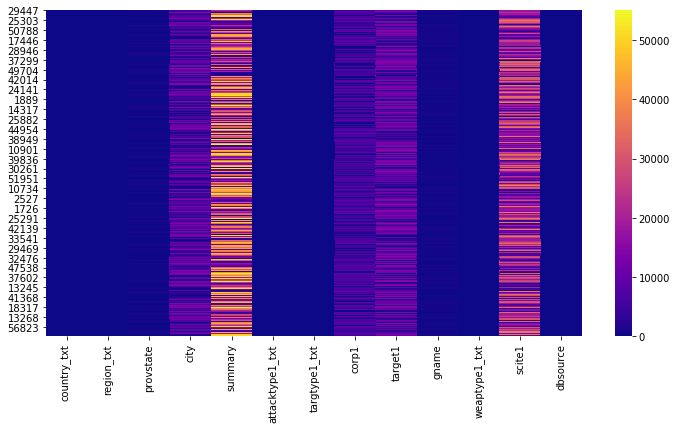

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(random_sample,cmap='plasma',)